# XGBOOST_RL_Respiratorio_Digestivo_ADenise_03_out20

### Dataset SIH_AIH_SP_2017 com as variéveis munic_res e diag_princ (aparelho digestivo K00-K99) e

### Dataset Entorno02_SP2 com todas as variáveis 

### Preenchendo os campos X com Zero eliminando os NAN, Nulos e Duplicados. 

## 04OUT - Conclusão = 

## Regressão Logistica:

### Acuracia de 0,60   -     Precision de 60  -   Recall de 1.0


### As variaveis geograficas (ambientais):

#### V268 (domicilios com moradia permanente 1 a 2 SM),
#### V270 (domicilios com moradia permanente mais de 2SM),
#### V266 (domicilios com moradia permanente 1/2 a 1 SMV2) e 
#### V264 (domicilios com moradia permanente 1/4 a 1/2 SM) 

### apresentaram as pontuações mais altas em termos de importância das variáveis, e esses são os que estão incluídos nos modelos para prever a variável de resultado.


# Bibliotecas

In [92]:
! pip install graphviz
! pip install pydotplus
! pip install imblearn

In [93]:
! pip install plotly_express
import plotly_express as px

In [94]:
import matplotlib
matplotlib.__version__

'3.3.1'

In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [96]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 4),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)
# parâmetros dos gráficos para o arquivo

In [97]:
#arquivo = r'C:\Users\Acer\OneDrive\Documents\Data Science\Aulas_Prof_Pedro_Moretti\Weekly.xlsx'
#dataset = pd.read_excel(arquivo, head='None', sep=';', decimal = ',')

## features = colunas = significado

### Acoplamento com arquivo entorno SP02 (cidades diferentes da Capital)
### Col: e02 [Sit_set, 206,254,260,262,264,266,268,270,272,358,360,362,364,366,368,370,372,374,376,378)]
### chave primária deverá ser "Cod_setor", derivada do "munic_res"
### V206 = domicílios com moradia inadequada - existe ident. logradouro
### V254 = domicilios com moradia permanente inadequada -- existe lixo a céu aberto
### V256 = domicilios com moradia permanente adequada -- existe lixo a céu aberto
### V260 = domicilios com moradia permanente inadequada -- existe lixo acumulado
### V262 = domicilios com moradia permanente até 1/4 SM
### V264 = domicilios com moradia permanente 1/4 a 1/2 SM
### V266 = domicilios com moradia permanente 1/2 a 1 SM
### V268 = domicilios com moradia permanente 1 a 2 SM
### V270 = domicilios com moradia permanente mais de 2SM
### V272 = domicilios com moradia permanente sem rendimento nominal
### V358 = domicilios com moradia permanente até 1/4 SM -- existe esgoto a céu aberto
### V360 = domicilios com moradia permanente  1/4  a 1/2 SM -- existe esgoto a céu aberto
### V362 = domicilios com moradia permanente 1/2 a 1 SM -- existe esgoto a céu aberto
### V364 = domicilios com moradia permanente 1 a 2 SM -- existe esgoto a céu aberto
### V366 = domicilios com moradia permanente mais de 2 SM -- existe esgoto a céu aberto
### V368 = domicilios com moradia permanente sem rendimento nominal -- existe esgoto a céu aberto
### V370 = domicilios com moradia permanente até 1/4 SM  --  existe lixo acumulado
### V372 = domicilios com moradia permanente 1/4 & 1/2 SM  --  existe lixo acumulado
### V374 = domicilios com moradia permanente 1/2 & 1 SM  --  existe lixo acumulado
### V376 = domicilios com moradia permanente 1 & 2 SM  --  existe lixo acumulado
### V378 = domicilios com moradia permanente mais de 2 SM  --  existe lixo acumulado
### V380 = domicilios com moradia permanente sem rendimento  --  existe lixo acumulado

### Dataset SIH_AIH_SP_2017 com as variéveis munic_res e diag_princ 
# (aparelho digestivo K00-K99) e (aparelho respiratório J00-J99)

Codigo e Descrição das Doenças
J189 Pneumonia NE,
J180 Broncopneumonia NE
A419  Septicemia NE
K409 Hernia inguinal unilat NE s/obstr gangrena e
K359 Apendicite aguda SOE)


### Dataset Entorno02_SP2 com todas as variáveis 

### Preenchendo os campos X com Zero eliminando os NAN, Nulos e Duplicados. 


In [98]:
dataset1 = pd.read_csv(r'C:\Users\Acer\Documents\Arquivos_Dados\mg.csv', sep=',', encoding = 'latin',
                           low_memory=False, error_bad_lines=False) #.clean_names() #nrows=8000

print(dataset1.shape)
dataset1.sample(3)

(194597, 27)


munic_res diag_princ subgrupo  Situacao_setor  V206  V250  V254  V256  \
154125     352680       J189        J               1     0     0     0     0   
46024      350900       K429        K               1     0    35     0     3   
173416     351740       K409        K               1     0     0     0     0   

        V260  V262  V264  V266  V268  V270  V272  V358  V360  V362  V364  \
154125     0     0     7    28    53   136     8     0     0     0     0   
46024      0    14    39    97    63    23    47     0     2    17     9   
173416     0     8    27   112   109    29    45     0     0     0     0   

        V366  V368  V370  V372  V374  V376  V378  V380  
154125     0     0     0     0     0     0     0     0  
46024      2     5     1     1     0     1     0     0  
173416     0     0     0     0     0     0     0     0

### Col: e02 [Sit_set, 206,254,260,262,264,266,268,270,272,358,360,362,364,366,368,370,372,374,376,378)]

In [99]:
dataset = dataset1.loc[:, ['munic_res','Situacao_setor','subgrupo','V206','V250','V254','V256','V260','V262','V264','V266',
                           'V268','V270','V272','V358','V360','V362','V364','V366','V368','V370','V372','V374','V376',
                           'V378','V380','diag_princ']]

In [100]:
type(dataset)

pandas.core.frame.DataFrame

In [101]:
pd.set_option('display.max_columns', None)

In [102]:
#dataset.info(verbose=True)
# nr de linhas muito maior do que esperado, pode haver duplicação desnecessária

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194597 entries, 0 to 194596
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   munic_res       194597 non-null  int64 
 1   Situacao_setor  194597 non-null  int64 
 2   subgrupo        194597 non-null  object
 3   V206            194597 non-null  int64 
 4   V250            194597 non-null  int64 
 5   V254            194597 non-null  int64 
 6   V256            194597 non-null  int64 
 7   V260            194597 non-null  int64 
 8   V262            194597 non-null  int64 
 9   V264            194597 non-null  int64 
 10  V266            194597 non-null  int64 
 11  V268            194597 non-null  int64 
 12  V270            194597 non-null  int64 
 13  V272            194597 non-null  int64 
 14  V358            194597 non-null  int64 
 15  V360            194597 non-null  int64 
 16  V362            194597 non-null  int64 
 17  V364            194597 non-nu

In [104]:
dataset.shape

(194597, 27)

In [105]:
dataset.isnull().sum()

munic_res         0
Situacao_setor    0
subgrupo          0
V206              0
V250              0
V254              0
V256              0
V260              0
V262              0
V264              0
V266              0
V268              0
V270              0
V272              0
V358              0
V360              0
V362              0
V364              0
V366              0
V368              0
V370              0
V372              0
V374              0
V376              0
V378              0
V380              0
diag_princ        0
dtype: int64

In [106]:
dataset.head()

munic_res  Situacao_setor subgrupo  V206  V250  V254  V256  V260  V262  \
0     351060               1        J     0     0     0     0     0     3   
1     351060               1        J     0     0     0     0     0     3   
2     351060               1        J     0     0     0     0     0     2   
3     351060               1        J     0     0     0     0     0    10   
4     351060               1        J     0    34     0     0     0     9   

   V264  V266  V268  V270  V272  V358  V360  V362  V364  V366  V368  V370  \
0    18    98    88    29    14     0     0     0     0     0     0     0   
1    11    40    35    14     4     0     0     0     0     0     0     0   
2     9    33    31     9     5     0     0     0     0     0     0     0   
3    34    74    81    31    10     0     0     0     0     0     0     0   
4    32    79    92    54    36     2     2    11    15     3     6     0   

   V372  V374  V376  V378  V380 diag_princ  
0     0     0     0     0     0       J189  
1     0     0     0     0     0       J189  
2     0     0     0     0     0       J189  
3     0     0     0     0     0       J189  
4     0     0     0     0     0       J189

In [107]:
pd.value_counts(dataset["V250"]==0)

True     164733
False     29864
Name: V250, dtype: int64

In [108]:
pd.value_counts(dataset["V260"]==0)

True     193489
False      1108
Name: V260, dtype: int64

In [109]:
# Direction A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week
dataset['diag_princ'].value_counts()

J189    39287
K409    38992
K429    38971
K359    38968
J180    38379
Name: diag_princ, dtype: int64

In [110]:
dataset['subgrupo'].value_counts()

K    116931
J     77666
Name: subgrupo, dtype: int64

# REGRESSÃO LOGÍSTICA

#### diag_princ como int == diag_princ_n

In [111]:
dataset.head()

munic_res  Situacao_setor subgrupo  V206  V250  V254  V256  V260  V262  \
0     351060               1        J     0     0     0     0     0     3   
1     351060               1        J     0     0     0     0     0     3   
2     351060               1        J     0     0     0     0     0     2   
3     351060               1        J     0     0     0     0     0    10   
4     351060               1        J     0    34     0     0     0     9   

   V264  V266  V268  V270  V272  V358  V360  V362  V364  V366  V368  V370  \
0    18    98    88    29    14     0     0     0     0     0     0     0   
1    11    40    35    14     4     0     0     0     0     0     0     0   
2     9    33    31     9     5     0     0     0     0     0     0     0   
3    34    74    81    31    10     0     0     0     0     0     0     0   
4    32    79    92    54    36     2     2    11    15     3     6     0   

   V372  V374  V376  V378  V380 diag_princ  
0     0     0     0     0     0       J189  
1     0     0     0     0     0       J189  
2     0     0     0     0     0       J189  
3     0     0     0     0     0       J189  
4     0     0     0     0     0       J189

In [112]:
dataset['diag_princ'].value_counts()

J189    39287
K409    38992
K429    38971
K359    38968
J180    38379
Name: diag_princ, dtype: int64

In [113]:
X = dataset.iloc[:,3:26]
y = dataset.loc[:,'subgrupo']

In [114]:
y.head()

0    J
1    J
2    J
3    J
4    J
Name: subgrupo, dtype: object

In [115]:
y.unique()

array(['J', 'K'], dtype=object)

In [116]:
type(y)

pandas.core.series.Series

In [117]:
X.head()

V206  V250  V254  V256  V260  V262  V264  V266  V268  V270  V272  V358  \
0     0     0     0     0     0     3    18    98    88    29    14     0   
1     0     0     0     0     0     3    11    40    35    14     4     0   
2     0     0     0     0     0     2     9    33    31     9     5     0   
3     0     0     0     0     0    10    34    74    81    31    10     0   
4     0    34     0     0     0     9    32    79    92    54    36     2   

   V360  V362  V364  V366  V368  V370  V372  V374  V376  V378  V380  
0     0     0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0     0     0  
4     2    11    15     3     6     0     0     0     0     0     0

In [118]:
type(X)

pandas.core.frame.DataFrame

In [119]:
y.shape

(194597,)

In [120]:
#X.unique()

In [121]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()
# ajuste no campo dimensional das variáveis. Y deve ser 1D, mas pode estar aqui como 2D.

In [122]:
y = le.fit_transform(y)

In [123]:
y.shape

(194597, 1)

In [124]:
y = np.ravel(y)
y.shape

(194597,)

In [125]:
X.shape

(194597, 23)

In [126]:
print(y)

[0 0 0 ... 1 0 0]


In [127]:
type(X)

pandas.core.frame.DataFrame

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1234, stratify=y)

In [130]:
X.shape

(194597, 23)

In [131]:
y_train.shape

(136217,)

In [132]:
#print(y_train)

In [133]:
X_test.shape

(58380, 23)

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [135]:
def CMatrix(CM,labels =['J','K']):
    dataset = pd.DataFrame( data = CM, index = labels, columns = labels)
    dataset.index.name ='Real'
    dataset.columns.name = 'Previsto'
    dataset.loc['Total']= dataset.sum()
    dataset['Total']= dataset.sum(axis=1)
    return dataset

In [136]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(solver = 'sag', max_iter = 10000)
log = logistic_regression.fit(X_train,y_train)

# teste com resultados after treino
y_pred_test_log = log.predict(X_test) 
acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)

CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
CMatrix(CM)
# saída = matriz de confusão
# Direction A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

Previsto  J      K  Total
Real                     
J         0  23300  23300
K         0  35080  35080
Total     0  58380  58380

In [137]:
# mostrar os coef da regressão log
# como são obtidos, os coef não dizem muito
# necessário alterar os coef
# a função é logaritmica
log.coef_

array([[ 1.30903881e-03, -5.69055876e-05,  4.19624580e-03,
         7.27211284e-04, -1.61030181e-02, -9.78430212e-04,
         8.78838284e-04, -5.34194215e-04,  2.80285078e-04,
        -2.72864169e-05, -1.99112249e-04,  1.14214310e-03,
         6.99524992e-04, -1.44807812e-03,  1.29205207e-03,
        -2.05829201e-04,  8.52422437e-04,  1.33289950e-03,
        -6.60777818e-04, -4.56684762e-04, -7.18147776e-04,
        -2.00532863e-03, -2.02920476e-03]])

In [138]:
def Tabela (metrica):
    dataset = pd.DataFrame(data = metrica,
                      columns = ['Acurácia','Precisão','Recall'],
                      index = ['Regressão Logística'])
    return dataset 

In [48]:
metrica = [(acuracia_log, precisao_log , recall_log)]
Tabela(metrica)

Acurácia  Precisão  Recall
Regressão Logística  0.600891  0.600891     1.0

# Comparando BoostingClassifiers

Vamos comparar o uso de técnicas de*Gradient Boosting* e com o da regressão logística, tentando classificar as  diag_princ (K e J) com base no resultado.

In [143]:
! pip install lightgbm
! pip install xgboost

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Essencialmente, o conjunto de dados fornece vários recursos usados para prever a variável de resultado
(aparelho respiratorio = J, aparelho digestivo = K).

A extração de recursos está sendo usada para determinar os recursos mais importantes que influenciam a variável de 
resultado, ou seja, quais recursos têm a correlação mais forte com a incidência das doenças.

In [145]:
#y=df.Outcome
#x=df.drop(['Outcome'], axis=1)
#x.shape,y.shape

In [146]:
x = dataset.iloc[:,3:26]
y = dataset.loc[:,'subgrupo']
x.shape,y.shape

((194597, 23), (194597,))

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
# outro método de ensemble

ExtraTreesClassifier(n_estimators=10)

In [148]:
print(model.feature_importances_)

[0.00722072 0.0132553  0.0008822  0.01606819 0.00072591 0.09580452
 0.14480926 0.1658148  0.17028119 0.17011395 0.09407529 0.00765458
 0.01164168 0.01347846 0.01125247 0.00956744 0.00617141 0.00730776
 0.01100451 0.01609466 0.01091182 0.0095834  0.00628049]


<AxesSubplot:>

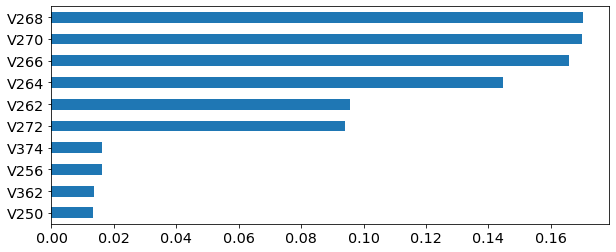

In [150]:
(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(10).sort_values().plot.barh())

Na extração do recurso, os recursos V268 (domicilios com moradia permanente 1 a 2 SM), V270 (domicilios com moradia permanente mais de 2SM), V266 (domicilios com moradia permanente 1/2 a 1 SMV2) e V264 (domicilios com moradia permanente 1/4 a 1/2 SM) apresentaram as pontuações mais altas em termos de importância do recurso, e esses são os que estão incluídos os modelos para prever a variável de resultado.

In [151]:
x0=x.iloc[:,0]
x1=x.iloc[:,1]
x5=x.iloc[:,5]
x6=x.iloc[:,6]
x7=x.iloc[:,7]
xnew=np.column_stack((x0,x1,x5,x6,x7))
xnew
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(xnew,y,random_state=0)

Portanto, essas variáveis foram definidas como xnew em uma pilha de colunas numpy e os dados foram particionados em dados de treinamento e validação com train_test_split.

## LogisticRegression Vs. BoostingClassifiers

Depois de selecionar os recursos relevantes e particionar os dados, uma regressão logística foi executada em conjunto com vários classificadores de impulso.

In [152]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(x_train,y_train)
logreg
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
#  LightGBM Classifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(learning_rate = 0.001, 
                              num_leaves = 65,  
                              n_estimators = 100)                       
lgb_model.fit(x_train, y_train)
 
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1, 
                            n_estimators = 100)
xgb_model.fit(x_train, y_train)
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.001)
ada_clf.fit(x_train, y_train)

print('*****************ClassifiersDone*****************')

*****************ClassifiersDone*****************


In [153]:
models=['Logistic','GradientBoost','LightGBM','XGBoost','AdaBoost']
Trainning_Accuracy=[logreg.score(x_train,y_train),
                    gbrt.score(x_train, y_train),
                    lgb_model.score(x_train, y_train),
                    xgb_model.score(x_train, y_train), 
                    ada_clf.score(x_train, y_train)]
Validation_Accuracy=[logreg.score(x_val, y_val),
                    gbrt.score(x_val, y_val),
                    lgb_model.score(x_val, y_val),
                    xgb_model.score(x_val, y_val), 
                    ada_clf.score(x_val, y_val)]
pd.DataFrame(list(zip(Trainning_Accuracy, Validation_Accuracy)), 
                  columns =['Trainning_Accuracy', 'Validation_Accuracy'],
                  index=models)

Trainning_Accuracy  Validation_Accuracy
Logistic                 0.600711             0.601418
GradientBoost            0.600835             0.600761
LightGBM                 0.600711             0.601418
XGBoost                  0.600711             0.601418
AdaBoost                 0.600711             0.601418

In [154]:
models=['Logistic','GradientBoost','LightGBM','XGBoost','AdaBoost']
Trainning_Precision=[logreg.score(x_train,y_train),
                    gbrt.score(x_train, y_train),
                    lgb_model.score(x_train, y_train),
                    xgb_model.score(x_train, y_train), 
                    ada_clf.score(x_train, y_train)]
Validation_Precision=[logreg.score(x_val, y_val),
                    gbrt.score(x_val, y_val),
                    lgb_model.score(x_val, y_val),
                    xgb_model.score(x_val, y_val), 
                    ada_clf.score(x_val, y_val)]
pd.DataFrame(list(zip(Trainning_Precision, Validation_Precision)), 
                  columns =['Trainning_Precision', 'Validation_Precision'],
                  index=models)

Trainning_Precision  Validation_Precision
Logistic                  0.600711              0.601418
GradientBoost             0.600835              0.600761
LightGBM                  0.600711              0.601418
XGBoost                   0.600711              0.601418
AdaBoost                  0.600711              0.601418

In [155]:
models=['Logistic','GradientBoost','LightGBM','XGBoost','AdaBoost']
Trainning_Recall=[logreg.score(x_train,y_train),
                    gbrt.score(x_train, y_train),
                    lgb_model.score(x_train, y_train),
                    xgb_model.score(x_train, y_train), 
                    ada_clf.score(x_train, y_train)]
Validation_Recall=[logreg.score(x_val, y_val),
                    gbrt.score(x_val, y_val),
                    lgb_model.score(x_val, y_val),
                    xgb_model.score(x_val, y_val), 
                    ada_clf.score(x_val, y_val)]
pd.DataFrame(list(zip(Trainning_Precision, Validation_Precision)), 
                  columns =['Trainning_Recall', 'Validation_Recall'],
                  index=models)

Trainning_Recall  Validation_Recall
Logistic               0.600711           0.601418
GradientBoost          0.600835           0.600761
LightGBM               0.600711           0.601418
XGBoost                0.600711           0.601418
AdaBoost               0.600711           0.601418

In [156]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
sc.fit(X_train)
X_train_st = sc.transform(X_train) 
X_test_st = sc.transform(X_test)

### REGRESSÂO LOGÍSTICA -- matriz de confusão

In [157]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(x_train,y_train)
logreg

LogisticRegression()

In [158]:
def Tabela (metrica):
    dataset = pd.DataFrame(data = metrica,
                      columns = ['Acurácia','Precisão','Recall'],
                      index = ['Regressão Logística'])
    return dataset 

In [159]:
metrica = [(acuracia_log, precisao_log , recall_log)]
Tabela(metrica)

Acurácia  Precisão  Recall
Regressão Logística  0.600891  0.600891     1.0

### GRADIENT BOOST CLASSIFIER -- matriz de confusão

In [160]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
gbrt

GradientBoostingClassifier(random_state=0)

In [161]:
def Tabela (metrica):
    dataset = pd.DataFrame(data = metrica,
                      columns = ['Acurácia','Precisão','Recall'],
                      index = ['Gradient Boost'])
    return dataset 

In [162]:
metrica = [(acuracia_log, precisao_log , recall_log)]
Tabela(metrica)

### EXTREME GRADIENT BOOST CLASSIFIER XGBOOST -- matriz de confusão

In [75]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1, 
                            n_estimators = 100)
xgb_model.fit(x_train, y_train)
xgb

<module 'xgboost' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\xgboost\\__init__.py'>

In [76]:
def Tabela (metrica):
    dataset = pd.DataFrame(data = metrica,
                      columns = ['Acurácia','Precisão','Recall'],
                      index = ['Regressão Logística'])
    return dataset 

In [163]:
metrica = [(acuracia_log, precisao_log , recall_log)]
Tabela(metrica)

Acurácia  Precisão  Recall
Gradient Boost  0.600891  0.600891     1.0